In [1]:
import numpy as np
import pandas as pd
import sys,os,json
from collections import Counter

sys.path.insert(1, '/home/chacoma/librerias/python')
from plotter_lib import *

db = '/home/chacoma/Lineas/football_4/data/'

arx1 =db+'Sample_Game_1/X_DS1_raw.json' 
arx2 =db+'Sample_Game_2/X_DS2_raw.json' 
arx3 =db+'Sample_Game_3/X_DS3_raw.json' 


In [26]:
arxk = db+"kappas/k1.dat"

kappa = np.loadtxt(arxk, usecols=[1])

l1 = np.nanmean(kappa)-np.nanstd(kappa)
l2 = np.nanmean(kappa)+np.nanstd(kappa)

kmax =max(kappa)
kmean=np.nanmean(kappa)


In [27]:
arxfi = db+"fi/fi1.dat"

fi = np.loadtxt(arxfi)

f1 = np.nanmean(fi)-np.nanstd(fi)
f2 = np.nanmean(fi)+np.nanstd(fi)

fimax =max(fi)
fimean=np.nanmean(fi)



In [3]:
d = json.load(open(arx1,'r'))

T = len(d["2"])

X1= np.array(d["1"])
X2= np.array(d["2"])

print (T, X1.shape, X2.shape )

del d

5800 (5800, 11, 2) (5800, 11, 2)


In [4]:
print (X1[:,:,0].min(), X1[:,:,0].max())
print (X2[:,:,0].min(), X2[:,:,0].max())

-3.022656 109.86633
-2.335032 108.02131199999998


In [5]:
print (X1[:,:,1].min(), X1[:,:,1].max())
print (X2[:,:,1].min(), X2[:,:,1].max())

-3.3948048000000006 71.40000000000003
-1.6696175999999996 71.40000000000003


<IPython.core.display.Javascript object>


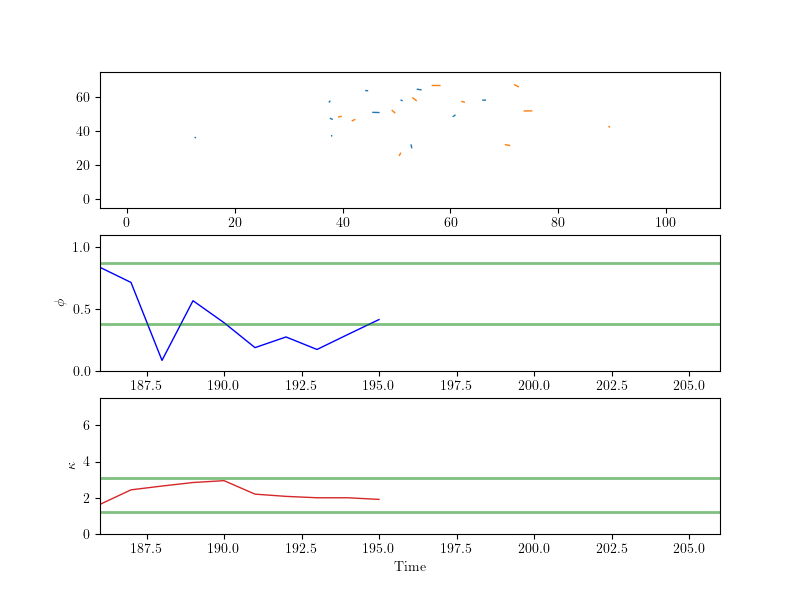

In [34]:
%matplotlib notebook


fig, ax = plt.subplots( 3,1, figsize=(8,6) )


ps = []

# equipo 1
for i in range(11):
    pi, = ax[0].plot([], [], linewidth=1, c="C0")
    ps.append(pi)

# equipo2
for i in range(11):
    pi, = ax[0].plot([], [], linewidth=1, c="C1")
    ps.append(pi)
    
ax[0].set_xlim(-5,110)
ax[0].set_ylim(-5,75)


# fi -----------------------------------------------
pi, = ax[1].plot([], [], linewidth=1, c="blue")
ps.append(pi)
tiempo = np.arange(0, len(fi), 1)

ax[1].axhline(f1, color='green', lw=2, alpha=0.5)
ax[1].axhline(f2, color='green', lw=2, alpha=0.5)

ax[1].set_xlim(0,None)
ax[1].set_ylim(0,1.1)

ax[1].set_xlabel("Time")
ax[1].set_ylabel("$\phi$")



#kappa ---------------------------------------------
pi, = ax[2].plot([], [], linewidth=1, c="C3")
ps.append(pi)
tiempo = np.arange(0, len(kappa), 1)

ax[2].axhline(l1, color='green', lw=2, alpha=0.5)
ax[2].axhline(l2, color='green', lw=2, alpha=0.5)

ax[2].set_xlim(0,None)
ax[2].set_ylim(0,kmax)

ax[2].set_xlabel("Time")
ax[2].set_ylabel("$\kappa$")


# -----------------------------------------------------


def init():

    for i in range(23):
        ps[i].set_data([], [])

    return ps



def animate(i):
    
    
    x1= X1[i]
    dx1 = X1[i+1]-x1
    
    x2= X2[i]
    dx2 = X2[i+1]-x2
    
    for j in range(11):
        ps[j].set_data( [ x1[j,0],x1[j,0]+dx1[j,0] ], [ x1[j,1],x1[j,1]+dx1[j,1]  ] )
        
        ps[j+11].set_data( [ x2[j,0],x2[j,0]+dx2[j,0] ], [ x2[j,1],x2[j,1]+dx2[j,1]  ] )
    
    
    ps[22].set_data( tiempo[i-10:i], fi[i-10:i] )
    ax[1].set_xlim(i-10,i+10)
    
    
    ps[23].set_data( tiempo[i-10:i], kappa[i-10:i] )
    ax[2].set_xlim(i-10,i+10)

    
    return ps



anim = FuncAnimation(fig, animate, init_func=init,
                               frames=(500), interval=200, blit=True)
#anim.save("test1.mp4")



<h1> Diagrama de faes $\kappa$ vs $\phi$

In [15]:
print (len(kappa), len(fi))

5800 5799


<IPython.core.display.Javascript object>


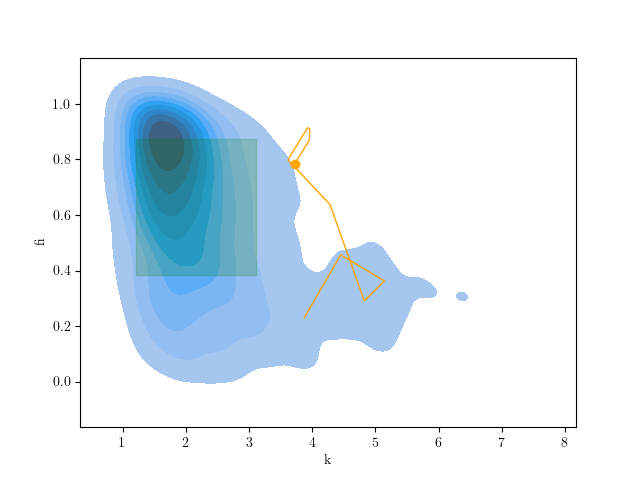

In [35]:
%matplotlib notebook
import seaborn as sb
d = {"k":kappa[:5799], 'fi':fi}

fig,ax = plt.subplots()

ps = []

color='orange'

pi, = ax.plot([], [], linewidth=1, c=color)
ps.append(pi)

pi, = ax.plot([], [], linewidth=0, marker='o', c=color)
ps.append(pi)



def init():
    ps[0].set_data([], [])
    return ps



def animate(i):
    
    ps[0].set_data( d["k"][i-10:i], d["fi"][i-10:i] )
    
    ps[1].set_data( [d["k"][i-1]], [d["fi"][i-1]] )
    
    return ps


# fondo
sb.kdeplot( data=d, x="k", y="fi", fill=True, ax=ax)

from matplotlib.patches import Rectangle

x0 = ( l1,f1)
ancho= 2*(kmean-l1)
alto= 2*(fimean-f1)



ax.add_patch(Rectangle(x0, ancho, alto, alpha=0.2, color='green'))





# animacion
anim = FuncAnimation(fig, animate, init_func=init,frames=(500), interval=200, blit=True)